### Crawling
- 데이터 수집 


### requests 라이브러리 
- 서버에게 페이지정보를 요청하여 응답받기 위한 라이브러리! 
- 원래는 브라우저를 통해서 서버에 페이지 정보를 요청하지만, 
- 크롤링에서는 requests 라이브러리를 사용해서 페이지 정보를 요청 후 응답받는다.

In [8]:
# 라이브러리 
import requests as req 
# 페이지정보를 요청하고 응답받으면 역할이 끝난다.


In [15]:
# 네이버 페이지의 정보 요청 후 응답받기!
url = 'https://www.naver.com/'
res = req.get(url) # url 주소의 페이지 정보 가져와!
res

<Response [200]>

- Response [200] : 정보를 성공적으로 응답받았다는 의미
- Response [400] : 클라이언트의 요청에 문제가 있을때 발생하는 오류코드 
- Response [500] : 서버의 응답에 문제가 있을때 발생하는 오류코드 

In [16]:
# 우리가 요청했던 naver 페이지의 정보 확인 
res.text

'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" 

### 네이버 페이지에서 '날씨'키워드 검색 후 데이터 수집
✅ 페이지가 변경되면 반드시 페이지정보를 다시 요청 후 응답받아야한다!

In [18]:
# 날씨페이지 정보 요청 후 응답받기 
url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EB%82%A0%EC%94%A8&oquery=%EB%82%A0%EC%94%A8&tqi=iffQedp0JXossRKD4P0ssssssOl-220419'
res = req.get(url)
res.text
# 응답받은 결과는 문자열 형태이다!!
# 컴퓨터가 인식할 수 있는 언어로 변경해주는 작업이 필요하다!! 

'<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta property="og:title" content="날씨 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'날씨\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'날씨\'의 네이버 통합검색 결과입니다."> <title>날씨 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_230914.css"> <link rel="stylesheet" type="text/css" href="h

### BeautifulSoup 라이브러리  ✅
- 문자열 형태의 데이터를 컴퓨터가 인식할 수 있는 html 언어로 변경해주는 라이브러리 
- 왜? 태그를 통해서 데이터를 추출할것이기 때문에 

In [19]:
#라이브러리 
from bs4 import BeautifulSoup as bs 

In [23]:
# beautifulsoup 객체화 -> 파싱
# bs(페이지정보,'파싱방법')
soup = bs(res.text,'lxml')

In [24]:
# 브라우저 -> 개발자모드 
soup.select('a') #태그이름을 문자열로 가져옴
# 모든 'a' 태그를 가져온것을 확인 

[<a href="#lnb"><span>메뉴 영역으로 바로가기</span></a>,
 <a href="#content"><span>본문 영역으로 바로가기</span></a>,
 <a class="link" href="https://www.naver.com" onclick="return goOtherCR(this, 'a=sta.naver&amp;r=&amp;i=&amp;u='+urlencode(this.href));"><i class="spnew ico_logo">NAVER</i></a>,
 <a aria-pressed="false" class="bt_setkr" href="#" id="ke_kbd_btn" onclick="return tCR('a=sch.ime');" role="button"> <i class="spnew ico_keyboard">한글 입력기</i> </a>,
 <a aria-pressed="false" class="bt_atcp _btn_arw" data-atcmp-element="" href="#" id="nautocomplete" role="button"><i class="spnew ico_arrow">자동완성 레이어</i></a>,
 <a aria-pressed="false" class="item _delAll" href="#" role="button">전체삭제</a>,
 <a class="kwd" href="#"> <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span> </a>,
 <a aria-pressed="false" class="bt_item _del" href="#" role="button"><i class="imsc ico_del">삭제</i></a>,
 <a class="kwd_help" href="https://help.naver.com/alias/search/word/word_3

- id선택자(#) : 전체페이지에서 단 한번만 사용가능한 구분자
- class선택자(.) : 전체페이지에서 여러번 사용가능, 다른 태그들과 구분할때 사용

In [36]:
# soup.select('태그명 선택자기호 이름')
soup.select('a.tab')
# select 해당되는 모든 태그를 추출 -> 리스트에 담겨있음!

[<a aria-selected="false" class="tab" href="?where=view&amp;sm=tab_jum&amp;query=%EB%82%A0%EC%94%A8" onclick="return goOtherCR(this,'a=tab*e.jmp&amp;r=1&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_view"></i>VIEW</a>,
 <a aria-selected="false" class="tab" href="?where=image&amp;sm=tab_jum&amp;query=%EB%82%A0%EC%94%A8" onclick="return goOtherCR(this,'a=tab*i.jmp&amp;r=2&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_image"></i>이미지</a>,
 <a aria-selected="false" class="tab" href="?where=kin&amp;sm=tab_jum&amp;query=%EB%82%A0%EC%94%A8" onclick="return goOtherCR(this,'a=tab*k.jmp&amp;r=3&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_kin"></i>지식iN</a>,
 <a aria-selected="false" class="tab" href="?where=influencer&amp;sm=tab_jum&amp;query=%EB%82%A0%EC%94%A8" onclick="return goOtherCR(this,'a=tab*F.jmp&amp;r=4&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_inf"></i>인플루언서</a>,
 <a

In [35]:
soup.select_one('a.tab')
# 해당되는 태그중에서 가장 첫번째 데이터를 추출! (select_one)

<a aria-selected="false" class="tab" href="?where=view&amp;sm=tab_jum&amp;query=%EB%82%A0%EC%94%A8" onclick="return goOtherCR(this,'a=tab*e.jmp&amp;r=1&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_view"></i>VIEW</a>

In [31]:
# 우리가 추출한 데이터 -> 요소 
# 필요한 데이터 -> 콘텐츠
# 요소에서 우리가 필요한 콘텐츠만 추출하는 작업 : 요소.text 

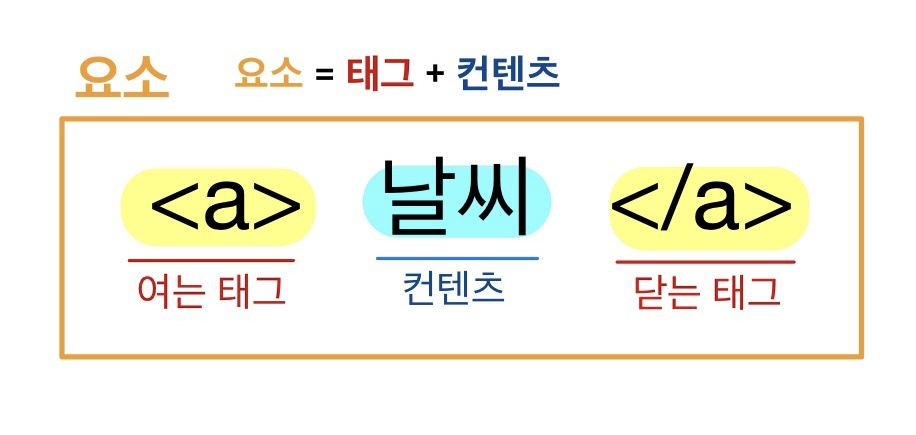

In [33]:
# 콘텐츠 추출 (요소.text)
soup.select_one('a.tab').text

'VIEW'

In [40]:
### 인덱싱 후 text 진행 ! 
soup.select('a.tab')[1].text

'이미지'

### 날씨페이지에서 현재온도 추출하기 

In [76]:
# 1. 페이지 정보 받아오기 
url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EB%82%A0%EC%94%A8&oquery=%EB%82%A0%EC%94%A8&tqi=iffQedp0JXossRKD4P0ssssssOl-220419'
res = req.get(url)
# 2. beautifulsoup 객체화
soup = bs(res.text,'lxml')
# 3. 태그정보를 통해서 콘텐츠 추출
soup.select('strong')

In [90]:
temperature_text = soup.select('div.temperature_text > strong')[0].text
temperature_text

'현재 온도19.3°'

### 뉴스데이터 제목 추출


In [98]:
for i in range(4):
    print(soup.select('a.news_tit')[i].text)

맑지만 쌀쌀한 출근길…서울 아침 기온 13도[오늘날씨]
쌀쌀한 날씨
밤사이 내린 비…출근길 어제보다 더 '쌀쌀', 일교차 큰 날씨
'선선한 가을 날씨' ... 환절기 건강관리
